함수호출

In [2]:
import pandas as pd
import time,datetime
import numpy as np
from pandas import *
# from informs import portfolio
from informs_Copy2 import portfolio
import class_informs_Copy3 as inform

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import math
import random as ran
from scipy.stats import truncnorm
#import seaborn as sbn

import time,datetime
import cmath

import re
import matplotlib.pyplot as plt

import os
import ipyparallel as ipp
import generator
import discriminator
import heapq
import random
import operator

데이터 전처리

In [3]:
#timeseries data
all_data=pd.read_csv('data/Timeseries_data_SP500.csv')

all_data['DATE']=pd.to_datetime(all_data['DATE'])
all_data=all_data.rename(columns={'NAME':'name','DATE':'date','SEDOL':'sedol','SECTOR':'sector','BETA':'beta','ALPHA_SCORE':'as','BENCH_WEIGHT':'bw',"MCAP_Q":'mq'})
sedol_list=all_data['sedol'].unique().tolist()

date_list=list(set(list(all_data['date'])))
date_list.sort()

dic_data = {k: v for k, v in all_data.groupby('date')}

results_=pd.read_csv('data/results_template.csv')
results_=results_.rename(columns={'DATE':'date','SEDOL':'sedol','WEIGHTS':'w','FOUR_WEEKLY_RETURN':'r'})
results_['date']=pd.to_datetime(results_['date'])
dic_results_={k: v for k, v in results_.groupby('date')}

dic_r_all={}
for i in date_list:
    rr={}
    for j,k in zip(list(dic_results_[i]['sedol']),list(dic_results_[i]['r'])):
        rr[j]=k
    dic_r_all[i]=rr

def preprocessing(date):
    
    using_dic = dic_data[pd.to_datetime(date)]
    using_dic['index']=list(using_dic.index)

    asset_list = []
    for i in using_dic["sedol"]:
        asset_list.append(i)


    dic_sedol_as = {using_dic["sedol"][i] : using_dic["as"][i] for i in using_dic.index}

    dic_bench = {using_dic["sedol"][i] : using_dic["bw"][i] for i in using_dic.index}

    dic_beta = {using_dic["sedol"][i] : using_dic["beta"][i] for i in using_dic.index}

    dic_sector = {using_dic["sector"][i] : [] for i in using_dic.index }

    dic_MCAP = {using_dic["mq"][i] : [] for i in using_dic.index}

    dic_aseet_MCAP = {using_dic["sedol"][i] : using_dic["mq"][i] for i in using_dic.index}
    
    dic_aseet_sector = {using_dic["sedol"][i] : using_dic["sector"][i] for i in using_dic.index}
    
    for i in using_dic.index:
        dic_sector[using_dic["sector"][i]].append(using_dic["sedol"][i])
        dic_MCAP[using_dic["mq"][i]].append(using_dic["sedol"][i])



    #risk:cov_mat
    date_str=str(date)[:10]
    risk_data=pd.read_csv('data/Riskmodels/cov_mat_%s.csv'%(date_str))
    risk_sedol=risk_data['ROW_INDEX'].unique().tolist()
    risk_mat = np.zeros((len(risk_sedol),len(risk_sedol)))
    risk_mat[np.triu_indices(len(risk_sedol), 0)] = list(risk_data['VALUE'])
    irows,icols = np.triu_indices(len(risk_sedol),0)
    risk_mat[icols,irows]=risk_mat[irows,icols]
    #         return risk_data,risk_sedol,risk_mat

    
    alpha = []
    
    dic_risk_index = {}
    index_ri = 0

    for i in risk_sedol:
        dic_risk_index.update({i:index_ri})
        index_ri += 1
        alpha.append(-1*dic_sedol_as[i])

    dic_r={dic_results_[date]["sedol"][i] : dic_results_[date]["r"][i] for i in using_dic.index}

    return using_dic,asset_list,dic_sedol_as,dic_bench,dic_beta,dic_sector,dic_MCAP,risk_sedol,risk_mat,dic_r,alpha,dic_aseet_MCAP,dic_aseet_sector,dic_risk_index

print("complete")


complete


In [41]:
abc = pd.read_csv('data/results_template.csv')
# abc['WEIGHTS'][:492]
x = {}

abc = pd.read_csv('data/results_template.csv')
for i in range(492) :
    x.update({abc['SEDOL'][i]:abc['WEIGHTS'][i]})
x

{'2000019': 0.0,
 '2002305': 0.0050352159999999995,
 '2002479': 0.0,
 '2005973': 0.0,
 '2007849': 0.0,
 '2008154': 0.0,
 '2011602': 0.0,
 '2017213': 0.0,
 '2018175': 0.0,
 '2019479': 0.0,
 '2019952': 0.010985554999999999,
 '2020459': 0.0,
 '2021690': 0.0,
 '2023607': 0.0,
 '2023737': 0.0,
 '2023748': 0.0,
 '2024020': 0.0,
 '2026082': 0.0,
 '2026242': 0.0,
 '2026361': 0.010836574999999999,
 '2027104': 0.0,
 '2027342': 0.0,
 '2028572': 0.0,
 '2029809': 0.0,
 '2032067': 0.0,
 '2032380': 0.0015878699999999999,
 '2033004': 0.017966925000000002,
 '2034494': 0.0,
 '2034524': 0.0,
 '2038430': 0.0,
 '2039831': 0.0,
 '2041364': 0.0,
 '2043694': 0.01194809,
 '2043962': 0.0,
 '2044545': 0.015175948,
 '2046251': 0.0,
 '2046552': 0.0,
 '2047317': 0.0,
 '2048804': 0.0,
 '2050832': 0.0,
 '2057059': 0.0,
 '2065159': 0.0,
 '2065308': 0.0,
 '2065955': 0.0,
 '2066408': 0.001656458,
 '2066721': 0.0,
 '2068921': 0.0,
 '2069065': 0.0,
 '2073022': 0.015359613000000001,
 '2073408': 0.0,
 '2077905': 0.0,
 '2081

함수 정의

In [45]:
def cal_obj(sol, risk_mat, as_) :

    a = np.full((len(risk_mat[0]), len(risk_mat[0])), 10000)
    risk_mat = risk_mat * a
    s_rr = np.dot(sol, risk_mat)
    s_r = np.dot(s_rr, sol)
    s_a = np.dot(sol, as_*10000)
    obj = s_r-s_a
    return obj



def TE_change(sol):
    
    w_list = []
    for i in risk_sedol:
        w_list.append(sol[i])

    diff_out = np.array([0]*len(as_), float)
    diff_sub = np.array([0]*len(as_), float)

    candi = []
    indnum = 0
    indnum2 = 0
    indnum3 = 0
    indnum4 = 0

    chek_one = 0

    for i in risk_sedol :
        if sol[i] > 0:
            chek_one += 1
            save_risk = 0
            for j in risk_sedol :
                if sol[j] > 0:
                    save_risk += risk_mat[indnum][indnum2]                                
                indnum2 += 1
            save_risk += alpha[indnum]
            diff_out[indnum] = save_risk 
        indnum += 1
        indnum2 = 0
    
    w_list[np.where(diff_out == max(diff_out[diff_out>0]))[0][0]] = 0   
    
    print(np.where(diff_out == max(diff_out[diff_out>0]))[0][0])
    
    in_cady = np.where(diff_out == max(diff_out[diff_out>0]))[0][0]
    
    for i in risk_sedol :
        if sol[i] == 0:
            save_risk = 0            
            for j in risk_sedol :
                if sol[j] > 0:
                    save_risk += risk_mat[indnum3][indnum4]
                indnum4 += 1
            save_risk += alpha[indnum3]
            save_risk += risk_mat[indnum3][indnum3]
            diff_sub[indnum3] = save_risk                     
        indnum3 += 1
        indnum4 = 0

    print(np.where(diff_sub == min(diff_sub[diff_sub>0]))[0][0])


    w_list[np.where(diff_sub == min(diff_sub[diff_sub>0]))[0][0]] = 0.1

    for val in range(len(w_list)) :
        if w_list[val] > 0. :
            candi.append(val)
    print(candi)
    #print("candi")

    return candi



def MCAPQ_check(w_dic):

    MCAPQ_sum_dic = {}
    d_sum_dic = {}
    d_sum_dic2 = {}

    for i in dic_MCAP:
#         updatenum = -0.1
        d_sum_dic.update({i:0})
        d_sum_dic2.update({i:0})
#         for j in dic_sector[i]:
#             updatenum += dic_bench[j]
#         Sector_sum_dic.update({i:updatenum})

    for i in risk_sedol:
        if w_dic[i] > 0:
            savenum = d_sum_dic[dic_aseet_MCAP[i]]
            savenum += 0.05
            d_sum_dic.update({dic_aseet_MCAP[i]:savenum})
            savenum = 0
        else:
            savenum = d_sum_dic[dic_aseet_MCAP[i]]
            savenum = savenum - dic_bench[i]
            d_sum_dic.update({dic_aseet_MCAP[i]:savenum})
            savenum = 0

    in_MCAPQ = -999
    out_MCAPQ = -999
    for i in d_sum_dic:
        if d_sum_dic[i] < -0.01:
            in_MCAPQ = i
            print("IN_MCAPQ :",in_MCAPQ)
            print(d_sum_dic[i],"1111111111111111")
            print(d_sum_dic)
            out_MCAPQ = max(d_sum_dic.keys(), key=(lambda k: d_sum_dic[k]))
            print("out : ",out_MCAPQ) 
            return in_MCAPQ,out_MCAPQ
            break

    if in_MCAPQ == -999:
        print("nono MC")
        return 100   

    

@ipp.require(cal_obj)
def select_candi(sol) :
    
    diff_sub = np.array([0]*len(as_), float)
    diff_add = np.array([0]*len(as_), float)
    candi = []

    for i in range(len(sol)) :
        if(sol[i] > 0) :
            w = sol[i]
            sol[i] = 0
            diff_sub[i] = cal_obj(sol, risk_mat, as_)
            if min(diff_sub[diff_sub>0]) == diff_sub[i] :
                for j in range(len(sol)) :
                    if sol[j] == 0 :
                        sol[j] = w
                        diff_add[j] = cal_obj(sol, risk_mat, as_)
                        sol[j] = 0
            sol[i] = w
        
    sol[np.where(diff_sub == min(diff_sub[diff_sub>0]))[0][0]] = 0
    sol[np.where(diff_add == min(diff_add[diff_add>0]))[0][0]] = 0.1

    for val in range(len(sol)) :
        if sol[val] > 0. :
            candi.append(val)
            
    return candi



def MCAPQ_change(sol,inM,outM):
    w_list = []
    
    for i in risk_sedol:
        w_list.append(sol[i])


    print("inM : ",inM)
    print("outM : ",outM)
    
    diff_out = np.array([0]*len(as_), float)
    diff_sub = np.array([0]*len(as_), float)
    

    candi = []
    indnum = 0
    indnum2 = 0
    indnum3 = 0
    indnum4 = 0
#     risk[A][A] + risk[A][E] +risk[E][A]

    chek_one = 0

    for i in risk_sedol :
        if sol[i] > 0 and dic_aseet_MCAP[i] == outM:
            chek_one += 1
            save_risk = 0
            for j in risk_sedol :
                if sol[j] > 0 and dic_aseet_MCAP[j] == outM:
                    save_risk += risk_mat[indnum][indnum2]                                
                indnum2 += 1
            save_risk += alpha[indnum]
            diff_out[indnum] = save_risk 
        indnum += 1
        indnum2 = 0
    
    if chek_one == 1:
        in_cady = -99999999999999999999
    
    w_list[np.where(diff_out == max(diff_out[diff_out>0]))[0][0]] = 0   
    
    print(np.where(diff_out == max(diff_out[diff_out>0]))[0][0])
    
    in_cady = np.where(diff_out == max(diff_out[diff_out>0]))[0][0]
    
    for i in risk_sedol :
        if sol[i] == 0 and dic_aseet_MCAP[i] == inM:
            save_risk = 0            
            for j in risk_sedol :
                if sol[j] > 0 and dic_aseet_MCAP[j] == outM and indnum4 != in_cady:

                    save_risk += risk_mat[indnum3][indnum4]
                indnum4 += 1
            save_risk += alpha[indnum3]
            save_risk += risk_mat[indnum3][indnum3]
            diff_sub[indnum3] = save_risk                     
        indnum3 += 1
        indnum4 = 0


    
    print(np.where(diff_sub == min(diff_sub[diff_sub>0]))[0][0])


    w_list[np.where(diff_sub == min(diff_sub[diff_sub>0]))[0][0]] = 0.1

    for val in range(len(w_list)) :
        if w_list[val] > 0. :
            candi.append(val)
    print(candi)
    #print("candi")

    return candi



def Sector_check(w_dic):

    Sector_sum_dic = {}
    d_sum_dic = {}
    d_sum_dic2 = {}
    
    for i in dic_sector:
#         updatenum = -0.1
        d_sum_dic.update({i:0})
        d_sum_dic2.update({i:0})
#         for j in dic_sector[i]:
#             updatenum += dic_bench[j]
#         Sector_sum_dic.update({i:updatenum})

    for i in risk_sedol:
        if w_dic[i] > 0:
            savenum = d_sum_dic[dic_aseet_sector[i]]
            savenum += 0.05
            d_sum_dic.update({dic_aseet_sector[i]:savenum})
            savenum = 0
        else:
            savenum = d_sum_dic[dic_aseet_sector[i]]
            savenum = savenum - dic_bench[i]
            d_sum_dic.update({dic_aseet_sector[i]:savenum})
            savenum = 0
    
    in_Sector = -999
    out_Sector = -999
    for i in d_sum_dic:
        if d_sum_dic[i] < -0.01:
            in_Sector = i
            print(d_sum_dic[i])
            print(d_sum_dic)
            out_Sector = max(d_sum_dic.keys(), key=(lambda k: d_sum_dic[k]))
            print("in_Sector : ",in_Sector,"  out_Sector : ",out_Sector)
            return in_Sector,out_Sector
            break
    
    if in_Sector == -999:
        print("nono se")
        return 100  
        
    
    

def Sector_change(sol,inS,outS):
    w_list = []
    
    for i in risk_sedol:
        w_list.append(sol[i])


    print("inS : ",inS)
    print("outS : ",outS)
    
    diff_out = np.array([0]*len(as_), float)
    diff_sub = np.array([0]*len(as_), float)
    

    candi = []
    indnum = 0
    indnum2 = 0
    indnum3 = 0
    indnum4 = 0
#     risk[A][A] + risk[A][E] +risk[E][A]

    chek_one = 0

    for i in risk_sedol :
        if sol[i] > 0 and dic_aseet_sector[i] == outS:
            chek_one += 1
            save_risk = 0
            for j in risk_sedol :
                if sol[j] > 0 and dic_aseet_sector[j] == outS:
                    save_risk += risk_mat[indnum][indnum2]                                
                indnum2 += 1
            save_risk += alpha[indnum]

            diff_out[indnum] = save_risk 
        indnum += 1
        indnum2 = 0
    
    if chek_one == 1:
        in_cady = -99999999999999999999
    
    w_list[np.where(diff_out == max(diff_out[diff_out>0]))[0][0]] = 0   
    
    print(np.where(diff_out == max(diff_out[diff_out>0]))[0][0])
    
    in_cady = np.where(diff_out == max(diff_out[diff_out>0]))[0][0]
    
    for i in risk_sedol :
        if sol[i] == 0 and dic_aseet_sector[i] == inS:
            save_risk = 0            
            for j in risk_sedol :
                if sol[j] > 0 and dic_aseet_sector[j] == outS and indnum4 != in_cady:

                    save_risk += risk_mat[indnum3][indnum4]
                indnum4 += 1
            save_risk += alpha[indnum3]
            save_risk += risk_mat[indnum3][indnum3]
            diff_sub[indnum3] = save_risk                     
        indnum3 += 1
        indnum4 = 0


    
    print(np.where(diff_sub == min(diff_sub[diff_sub>0]))[0][0])


    w_list[np.where(diff_sub == min(diff_sub[diff_sub>0]))[0][0]] = 0.1

    for val in range(len(w_list)) :
        if w_list[val] > 0. :
            candi.append(val)
    print(candi)
    #print("candi")

    return candi



@ipp.require(Sector_change,TE_change,MCAPQ_change,select_candi,Sector_check,MCAPQ_check)
def update(sol) :
    try :
        new_list = []

        con = []
        nums = 0

        w_pre_len = 0
        sort_w_p = sorted(w_pre.items(),key=operator.itemgetter(1))
        save_w_p = len(sort_w_p) - 1
        print(w_pre[sort_w_p[save_w_p][0]],"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        w_p_key_list = []
        sol_len = 0

    except :
        343434
        
    try :
        for l in w_pre.keys():
            if w_pre[l] > 0 :
                w_pre_len += 1
                w_p_key_list.append(l)

    except :
        return 232323
    
    try :
        for k in range(int(w_pre_len/10)):
            if sol[sort_w_p[save_w_p][0]] < 0.9:
                sol.update({sort_w_p[save_w_p][0]:1})
            save_w_p = save_w_p - 1
    except :
        return 56566

    try :
        for k in risk_sedol : 
            if sol[k] > 0:
                sol_len += 1

        out_list = []
    except :
        return 121212
    
        if sol_len > 70:
            while(sol_len > 70):
                out_list = []
                for k in risk_sedol :
                    if sol[k] == 1 and k not in w_p_key_list:
                        out_list.append(k)

                out_risk_key = 10000
                out_risk_val = -10000
                for m in out_list:
                    if out_risk_val < risk_mat[dic_risk_index[m]][dic_risk_index[m]]:
                        out_risk_key = m
                        out_risk_val = risk_mat[dic_risk_index[m]][dic_risk_index[m]]
                sol[out_risk_key] = 0
                sol_len = sol_len - 1


            for k in risk_sedol :
                new_list.append(sol[k])
                if sol[k] == 1:
                    con.append(nums)
                nums += 1
        else:
            for k in risk_sedol :
                new_list.append(sol[k])
                if sol[k] == 1:
                    con.append(nums)

                nums += 1


        result_list = []
        result_list2 = []
    
    print(con)
    print(len(con))
    print("con")
    
    start_time = time.time()
    while(True):
        sol_len = 0
        for k in risk_sedol :
            if sol[k] > 0:
                sol_len += 1

        if time.time() - start_time > lim_time:
            break

        ex.set_con(cons=con)




        new_list2 = []
        new_list3 = []
        try:
            aabbaa = ex.solve(0.01)


            if aabbaa[0] == 0:
                print("TE infeasible")
                TE_out = aabbaa[1]
                print("TE_out : ",TE_out)
                con = TE_change(sol,TE_out)
                sol = {}
                cheknumb = 0
                connum = 0
                for i in risk_sedol:
                    if connum < len(con):
                        if con[connum] == cheknumb:
                            sol.update({i:1})
                            connum += 1
                        else:
                            sol.update({i:0})
                    else:
                            sol.update({i:0})
                    cheknumb += 1

            else:

                if aabbaa[0] == "sector":
                    print("S infeasible")
                    con = Sector_change(sol,aabbaa[1],aabbaa[2])
                    cheknumb = 0
                    connum = 0
                    sol = {}
                    for i in risk_sedol:
                        if connum < len(con):
                            if con[connum] == cheknumb:
                                sol.update({i:1})
                                connum += 1
                            else:
                                sol.update({i:0})
                        else:
                                sol.update({i:0})
                        cheknumb += 1

                elif aabbaa[0] == "MCAPQ":
                    print("M infeasible")
                    con = MCAPQ_change(sol,aabbaa[1],aabbaa[2])
                    cheknumb = 0
                    connum = 0
                    sol = {}
                    for i in risk_sedol:
                        if connum < len(con):
                            if con[connum] == cheknumb:
                                sol.update({i:1})
                                connum += 1
                            else:
                                sol.update({i:0})
                        else:
                                sol.update({i:0})
                        cheknumb += 1

                else:
                    aaaa = aabbaa[0][0]
                    bbbb= aabbaa[0][1]
                    for k in risk_sedol :
                        new_list2.append(aaaa[k])
                    for k in risk_sedol :
                        new_list3.append(bbbb[k])
                    new_list = new_list2

                    result_list.append(aabbaa[0][2])
                    result_list2.append(aabbaa[0][0])
                    print("obj_val")
                    print(cal_obj1(new_list3, risk_mat, as_))
                    TE_out = aabbaa[1]
                    con = TE_change(sol)
                    cheknumb = 0
                    connum = 0
                    sol = {}
                    for i in risk_sedol:
                        if connum < len(con):
                            if con[connum] == cheknumb:
                                sol.update({i:1})
                                connum += 1
                            else:
                                sol.update({i:0})
                        else:
                                sol.update({i:0})
                        cheknumb += 1
                    print("cplex_val")
                    print(aabbaa[0][2])


        except:
            print("cplex no solution")
            sc = Sector_check(sol)
            if sc == 100:
                mc = MCAPQ_check(sol)
                if mc == 100:
                    con = TE_change(sol)
                else:
                    con = MCAPQ_change(sol,mc[0],mc[1])                    
            else:
                con = Sector_change(sol,sc[0],sc[1])


            cheknumb = 0
            connum = 0
            sol = {}
            for i in risk_sedol:
                if connum < len(con):
                    if con[connum] == cheknumb:
                        sol.update({i:1})
                        connum += 1
                    else:
                        sol.update({i:0})
                else:
                        sol.update({i:0})
                cheknumb += 1


    return result_list,result_list2



def sample_Z(m, n):
    return Variable(torch.Tensor(np.random.uniform(0., 1., size=[m, n])))


        
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / np.sqrt(in_dim / 2.)
    return np.random.normal(size=size, scale=xavier_stddev)



@ipp.require(sample_Z) 
def GAN(rotation,w_pre_gan,n, car):
    X_dim = nbasset
    HL_dim = 50
    Z_dim = 10

    np.random.seed()

    G = generator.Generator(Z_dim, HL_dim, X_dim)

    sample_D = discriminator.Discriminator(in_dim=X_dim, train=False, risk_mat=risk_mat, bw=bw, beta=beta, alpha=alpha, w_11=0.1
                                           ,w_pre_gan=w_pre_gan,MONTH=n,c_lower=car,w_turn=1.)
    train_D = discriminator.Discriminator(in_dim=X_dim, train=True, risk_mat=risk_mat, bw=bw, beta=beta, alpha=alpha, w_11=0.1
                                          ,w_pre_gan=w_pre_gan,MONTH=n,c_lower=car,w_turn=1.)

    G_solver = optim.Adam(G.parameters(), lr=2e-3)

    mb_size = 128
    best_obj = 100000.0
    best_sols = []
    losses = []
    feasible_threshold = 0.95
    adaptive_inf_scale = float(nbasset)
    
    start_time = time.time()
    for it in range(rotation):
        if it % 900 == 0:
            sample_noise = sample_Z(128, Z_dim)
            samples = G(sample_noise)

            sample_D.Zstar = best_obj
            sample_D.inf_scale = adaptive_inf_scale

            sample_D_values = sample_D(samples).data.numpy()
            sample_obj_values = sample_D.objs.data.numpy()

            fea_sample_obj_values = sample_obj_values[sample_D_values > feasible_threshold]
            sols = samples.data.numpy()[sample_D_values > feasible_threshold]

            if len(fea_sample_obj_values > 0):
                best_idx = np.argmin(fea_sample_obj_values)
                if np.min(fea_sample_obj_values) < best_obj:
                    best_obj = np.minimum(fea_sample_obj_values[best_idx], best_obj)
                    best_sols.append(sols[best_idx])

        z = Variable(torch.randn(mb_size, Z_dim))

        train_D.Zstar = best_obj
        train_D.inf_scale = adaptive_inf_scale

        G_loss = -torch.mean(torch.log(train_D(G(z))))

        G.zero_grad()
        G_loss.backward()
        G_solver.step()
        
    return best_sols, sols,fea_sample_obj_values

        

def GAN_reulst(best_sols, sols,fea_sample_obj_values):    
    good_sols=np.argsort(fea_sample_obj_values)[:10]
    card_list=[list(np.where(sols[i]>0.001)[0]) for i in range(len(good_sols))]
    card_freq=np.zeros(nbasset)
    for i in range(len(card_list)):
        for j in card_list[i]:
            card_freq[j]+=1
    best=np.argsort(sum(sols))[::-1][:len(card_freq[card_freq>len(card_list)-5])]
    bestsol=np.where(best_sols[0]>0.001)[0]
    return best,bestsol



def init_cplex(risk_mat,risk_sedol):
    sedol_var_list =[]
    for i in risk_sedol:
        sedol_var_list.append("d"+str(i))

    for i in risk_sedol:
        sedol_var_list.append("q"+str(i))

    sedol_var_list.append("assum")

    alpha = []
    for i in risk_sedol:
        alpha.append(-10000.*dic_sedol_as[i])

    qmat=[]
    for i in range(len(risk_mat)):
        qmat_1=[]
        qmat_1.append(sedol_var_list)
        new_risk_mat=[]
        for j in risk_mat[i]:
            new_risk_mat.append(20000*j)
        for j in risk_mat[i]:
            new_risk_mat.append(0)
        new_risk_mat.append(0)
        qmat_1.append(new_risk_mat)
        qmat.append(qmat_1)

    for i in range(len(risk_mat)):
        qmat_1=[]
        qmat_1.append(sedol_var_list)
        new_risk_mat=[]
        for j in risk_mat[i]:
            new_risk_mat.append(0)
        for j in risk_mat[i]:
            new_risk_mat.append(0)
        new_risk_mat.append(0)
        qmat_1.append(new_risk_mat)
        qmat.append(qmat_1)

    for i in range(1):
        qmat_1=[]
        qmat_1.append(sedol_var_list)
        new_risk_mat=[]
        for j in risk_mat[i]:
            new_risk_mat.append(0)
        for j in risk_mat[i]:
            new_risk_mat.append(0)
        new_risk_mat.append(0)
        qmat_1.append(new_risk_mat)
        qmat.append(qmat_1)

    q_con1 = []
    q_con2 = []
    q_val = []

    for i in range(len((risk_mat[0]))):
        for j in range(len(risk_mat[0])):
            if j >= i:
                q_con1.append(i)
                q_con2.append(j)
                if i == j:
                    ex_list = list(risk_mat[i])
                    q_val.append(0.5*ex_list[j]*10000)
                else:
                    ex_list = list(risk_mat[i])
                    q_val.append(ex_list[j]*10000)

    Q_con = []
    Q_con.append(q_con1)
    Q_con.append(q_con2)
    Q_con.append(q_val)
    
    return Q_con, qmat, alpha



@ipp.require(GAN, GAN_reulst)
def ipp_gan(car) :
    
    group_by_sector = [[y[1] for y in gbs if y[0]==x] for x in sector_set]
    group_by_mq = [[y[1] for y in gbm if y[0]==x] for x in mq_set]
    w_pre_gan=np.zeros(len(asset_list))

    for i,j in enumerate(asset_list):
        if j in w_pre.keys(): w_pre_gan[i]=w_pre[j]
        else:w_pre_gan[i]=0.
    
    best_sols, sols,fea_sample_obj_values=GAN(1800,w_pre_gan,n, car)
    best,best_sol=GAN_reulst(best_sols, sols,fea_sample_obj_values)
    
    sol={}
    for i in range(len(risk_sedol)):
        if i in best: sol[risk_sedol[i]]=1.
        else: sol[risk_sedol[i]]=0.
    return sol,len(best)


print("complete")

complete


ipp 설정

In [5]:
#generate direct view
rc = ipp.Client()
dv = rc[:]
# print(rc.ids)
# os.getcwd()
dv.block=True
dv.execute('import numpy as np')
dv.execute('import class_informs_Copy3 as inform')
dv.execute('import time')
dv.execute('import generator')
dv.execute('import discriminator')
dv.execute('import torch.optim as optim')
dv.execute('from torch.autograd import Variable')
dv.execute('import torch')
dv.execute('import operator')

<AsyncResult: execute:finished>

Evaluation Criteria

In [6]:
def w_i_pre_sum(w_dic):
   
    w_pre = 0  
    
    for i in w_dic.keys():
        w_pre += w_dic[i]*(dic_r[i]+1)
        
        
    w_i_pre_dic = {}
    for i in w_dic.keys():
        w_i_pre_dic.update({i:(float(w_dic[i])*(dic_r[i]+1))/w_pre})

    return w_i_pre_dic



def turnover(w_dic,w_dic2, date, risk_sedol, dic_sedol_as):
    
    mon = date_list[date]
    mon2 = date_list[date-1]

    rotp_t0 = 0
    for i in risk_sedol:
        rotp_t0 += w_dic[i]*dic_r_all[mon2][i]
        
    w_pre = 0
    for i in risk_sedol:
        w_pre += w_dic[i]*(dic_r_all[mon2][i]+1)

    w_i_pre = {}
    w_i_pre_sum = 0
    for i in risk_sedol:
        w_i_pre.update({i:(w_dic[i]*(dic_r_all[mon2][i]+1))/w_pre})
        w_i_pre_sum += (w_dic[i]*(dic_r_all[mon2][i]+1))/w_pre
    
    pre_list = set(list(w_i_pre.keys()))
    pre_list2 = set(list(w_dic2.keys()))

    turnover = 0

    add_key_1 = pre_list-pre_list2
    add_key_2 = pre_list2-pre_list

    for i in add_key_2:
        w_i_pre.update({i:0})

    for i in add_key_1:
        w_dic2.update({i:0})

    pre_list.union(pre_list2)
    for i in pre_list:
        turnover += abs(w_dic2[i]-w_i_pre[i])

    rOTP = 0

    for i in dic_sedol_as.keys():
        rOTP += w_dic2[i]*dic_r_all[mon][i]

    r_Txadj_t = rOTP - turnover*0.005
    
    print("turnover : " + str(turnover))
    print("r_OTP : " + str(rOTP))
    print("r_Txadj_t : " + str(r_Txadj_t))
    
#     result=[]
#     result.append(turnover,rOTP,r_Txadj_t)
#     result.append(w_i_pre_sum)
    
#     return result

    return r_Txadj_t



def IR_TE(result,bench_t):
    cal1 = 1
    cal2 = 1
    list_std=np.array([])

    for i in range(len(result)):
        cal1 = cal1*(1+result[i])
        cal2 = cal2*(1+bench_t[i])
        list_std = np.append(list_std,result[i]-bench_t[i])
    
    IR = (cal1-cal2)/np.std(list_std)
    
    TE = math.sqrt(13)*np.std(list_std)
    
#     result = np.array([])
#     result = np.append(IR,TE)
#     return result

    return IR



def R_SR(result,bench,n):
    R_CUM = 1
    B_CUM = 1
    for i in range(len(result)):
        R_CUM = R_CUM*(1+result[t])
        
    for i in range(len(bench)):
        B_CUM = B_CUM*(1+bench[t])
    
    R_CUM = R_CUM-1
    
    B_CUM = B_CUM-1
    
    R_ANN = (1+R_CUM)**(13/n) - 1
    
    B_ANN = (1+B_CUM)**(13/n) - 1
    
    R_EXAN = R_ANN-B_ANN
    
    r_t = np.array(result)
    
    SR = R_CUM/np.std(r_t)

solve!

In [ ]:
sol_pre = 0
risk_sedol_pre = []
    
feasi = 0
infeasi = 0
list_feasi_obj = []
list_feasi_sol = []
dic_bench_list = []

start_time1 = time.time()
n=0
for k in range(12):
    start_time = time.time()
    print("solve print : ", k, "번째")
    ############################################
    date=date_list[n]
    init_set='GAN' #initial set by GAN, cplex, random

    c_time = 10. #cplex time for initial set
    gan_rot = 1800 #GAN epoch size for initial set
    ############################################
    
    #data preprocessing
    using_dic,asset_list,dic_sedol_as,dic_bench,dic_beta,dic_sector,dic_MCAP,risk_sedol,risk_mat,dic_r,alpha,dic_aseet_MCAP,dic_aseet_sector,dic_risk_index=preprocessing(date)
    as_ = using_dic['as']
    if n == 0:
#         w_pre = {}
#         for j in risk_sedol:
#             w_pre.update({j:0})
        res_tem = pd.read_csv('data/results_template.csv')
        w_pre = {}
        for i in range(492) :
            w_pre.update({res_tem['SEDOL'][i]:abc['WEIGHTS'][i]})
    
    #set initial cardinality
    if init_set=='cplex':
        Q_con, qmat, alpha = init_cplex(risk_mat,risk_sedol)
        sol = portfolio(sector=dic_sector,bench=dic_bench,asset=risk_sedol,
                MCAPQ=dic_MCAP,beta=dic_beta,alpha=alpha,multiple=10000,time_init=90)[0][0]
        alpha = []
        for i in risk_sedol:
            alpha.append(-1*dic_sedol_as[i])
            
    elif init_set=='GAN':
        dv['bw'] = np.array(list(using_dic['bw']))
        dv['beta'] = np.array(list(using_dic['beta']))
        dv['alpha'] = np.array(list(using_dic['as']))
        dv['sector_set'] = set(list(using_dic['sector']))
        dv['sector_list'] = list(using_dic['sector'])
        dv['gbs'] = using_dic[['sector', 'index']].apply(tuple, axis=1)
        dv['mq_list'] = list(using_dic['mq'])
        dv['mq_set'] = set(list(using_dic['mq']))
        dv['gbm'] = using_dic[['mq', 'index']].apply(tuple, axis=1)
        dv['risk_sedol'] = risk_sedol
        dv['risk_mat'] = risk_mat
        dv['w_pre']=w_pre
        dv['n']=n
        dv['asset_list']=asset_list
        dv.execute('nbasset=len(bw)')
        dv.execute('nbsector=len(sector_set)')
        dv.execute('nbmq=len(mq_set)')
        
        car = [int(random.random()*20+50) for i in range(11)]
        ipp_sols = dv.map(ipp_gan, car)
        ipp_sol = []
        best_len = []
        for i in range(len(ipp_sols)) :
            ipp_sol.append(ipp_sols[i][0])
            best_len.append(ipp_sols[i][1])
        
        Q_con, qmat, alpha = init_cplex(risk_mat,risk_sedol)
        sol = portfolio(sector=dic_sector,bench=dic_bench,asset=risk_sedol,
                MCAPQ=dic_MCAP,beta=dic_beta,alpha=alpha,multiple=10000,time_init=90)[0][0]
        alpha = []
        for i in risk_sedol:
            alpha.append(-1*dic_sedol_as[i])
        
        sol_list = []
        for i in range(len(ipp_sol)) :
            sol_list.append(ipp_sol[i])

        sol_list.append(sol)
        
            
    elif init_set=='random':
        sol_list = []
        for i in range(12) :
            r=list(set(list(np.random.randint(len(risk_sedol),size=70))))
            sol={}
            for i in range(len(risk_sedol)):
                if i in r: sol[risk_sedol[i]]=1.
                else: sol[risk_sedol[i]]=0.
            sol_list.append(sol)
    
    print("GAN execute time : ", time.time()-start_time)
    start_time = time.time()
    
    
    
    dv['alpha'] = alpha
    dv['as_'] = as_
    dv['dic_sector'] = dic_sector
    dv['dic_bench'] = dic_bench
    dv['dic_MCAP'] = dic_MCAP
    dv['dic_beta'] = dic_beta
    dv['dic_aseet_MCAP'] = dic_aseet_MCAP
    dv['dic_aseet_sector'] = dic_aseet_sector
    dv['dic_risk_index'] = dic_risk_index
    
    dv.execute('lim_time = 10.')
    
#     if n == 0:
#         dv.execute('O_scale = 0')
#         dv.execute('ex = inform.informs(10000, 10000, w_pre, O_scale,dic_sector,dic_bench,risk_sedol,dic_MCAP,dic_beta,alpha,risk_mat)')
#         dv.execute(' ex.set_omega(risk_mat)')
#         results = dv.map(update, sol_list)

#     else:
    dv.execute('O_scale = 1')
    dv.execute('ex = inform.informs(10000, 10000, w_pre, O_scale,dic_sector,dic_bench,risk_sedol,dic_MCAP,dic_beta,alpha,risk_mat)')
    dv.execute(' ex.set_omega(risk_mat)')
    results = dv.map(update, sol_list)
        
    result_obj = []
    result_sol = []
    for i in range(len(results)) :
        for j in range(len(results[i][0])) :
            result_obj.append(results[i][0][j])
            result_sol.append(results[i][1][j])
    
    print("step2 time : ", time.time()-start_time)
    start_time = time.time()
    

    
    second_sol = []
    small_sol = heapq.nsmallest(min([6, len(result_obj)]), result_obj)
    for i in small_sol :
        second_sol.append(result_sol[result_obj.index(i)])
        
    car = [int(random.random()*20+50) for i in range(6)]
    ipp_sols = dv.map(ipp_gan, car)
    ipp_sol = []
    best_len = []
    for i in range(len(ipp_sols)) :
        ipp_sol.append(ipp_sols[i][0])
        best_len.append(ipp_sols[i][1])

    for i in range(len(ipp_sol)) :
        second_sol.append(ipp_sol[i])
        
    results = dv.map(update, second_sol)
    for i in range(len(results)) :
        for j in range(len(results[i][0])) :
            result_obj.append(results[i][0][j])
            result_sol.append(results[i][1][j])
            
#     result_sol1 = []
#     for i in result_sol :
#         result_sol1.append(i)
    
#     result_ropt = []
#     for i in result_sol :
#         if n==0 :
#             rotp_t0=0
#             for j in risk_sedol :
#                 rotp_t0 += i[j]*dic_r[j]
#             result_ropt.append(rotp_t0)
#         else :
#             result_ropt.append(turnover(w_dic=sol_pre, w_dic2=i, date=n, risk_sedol=risk_sedol_pre[n-1], dic_sedol_as=dic_sedol_as))

#     risk_sedol_pre.append(risk_sedol)
    
#     if n==0 :
#         sol_pre = result_sol[result_obj.index(min(result_obj))]
#     else :
#         sol_pre = result_sol[result_ropt.index(max(result_ropt))]
    
    try:
        print("best_obj : ", result_obj[result_obj.index(min(result_obj))])
        w_pre = w_i_pre_sum(result_sol[result_obj.index(min(result_obj))])

#         print("best_ropt : ", result_obj[result_ropt.index(max(result_ropt))])
#         w_pre = w_i_pre_sum(result_sol[result_ropt.index(max(result_ropt))])

        feasi += 1
        list_feasi_obj.append(min(result_obj))
        list_feasi_sol.append(result_sol[result_obj.index(min(result_obj))])
#         list_feasi_sol.append(result_sol[result_ropt.index(max(result_ropt))])
        dic_bench_list.append(dic_bench)
    
        print("------objective value 변화------")
        print(result_obj)
        n += 1
    except:
        infeasi += 1
    print("step3 time : ", time.time()-start_time)

print("total execute time : ", time.time()-start_time1)
print("feasible num : ", feasi)
print("infeasible num : ", infeasi)
# print("best objective value : ", min(list_feasi_obj))
# print("best solution : ", list_feasi_sol[list_feasi_obj.index(min(list_feasi_obj))])

solve print :  0 번째
CPXPARAM_TimeLimit                               90
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Threads                                 1
CPXPARAM_Read_APIEncoding                        "UTF-8"
CPXPARAM_MIP_Strategy_CallbackReducedLP          0
Tried aggregator 1 time.
MIP Presolve eliminated 1485 rows and 1 columns.
MIP Presolve modified 1476 coefficients.
Reduced MIP has 1011 rows, 984 columns, and 6025 nonzeros.
Reduced MIP has 492 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (2.55 ticks)
Found incumbent of value 0.002868 after 0.01 sec. (4.92 ticks)
Probing time = 0.00 sec. (0.35 ticks)
Tried aggregator 1 time.
Reduced MIP has 1011 rows, 984 columns, and 6025 nonzeros.
Reduced MIP has 492 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (2.60 ticks)
Probing time = 0.00 sec. (0.35 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: none, u

In [44]:
results

[321321321,
 321321321,
 321321321,
 321321321,
 321321321,
 321321321,
 321321321,
 321321321,
 321321321,
 321321321,
 321321321,
 321321321]

turnover실험

In [13]:
import pickle
pic = [list_feasi_obj, list_feasi_sol, dic_bench_list]
f = open('turnover7.txt', 'wb')
pickle.dump(pic, f)
f.close()

0
1
turnover : 1.49526997663
r_OTP : 0.0243966486929
r_Txadj_t : 0.0169202988097
turnover : 0.0660905395556
r_OTP : 0.0178727470298
r_Txadj_t : 0.017542294332
2
turnover : 1.42691297895
r_OTP : 0.00758145167468
r_Txadj_t : 0.000446886779956
turnover : 0.0562588024621
r_OTP : -0.0184278876629
r_Txadj_t : -0.0187091816752
3
turnover : 1.55584147734
r_OTP : 0.0159411988751
r_Txadj_t : 0.00816199148844
turnover : 0.0520966808497
r_OTP : 0.0107751507032
r_Txadj_t : 0.0105146672989
4
turnover : 1.11841111718
r_OTP : 0.043217455563
r_Txadj_t : 0.0376253999771
turnover : 0.0556457914513
r_OTP : 0.0451090073696
r_Txadj_t : 0.0448307784123
5
turnover : 1.43538431415
r_OTP : 0.023234820175
r_Txadj_t : 0.0160578986043
turnover : 0.0521194683985
r_OTP : 0.0322605994289
r_Txadj_t : 0.032000002087
6
turnover : 1.52630813363
r_OTP : -0.0265900355147
r_Txadj_t : -0.0342215761829
turnover : 0.054945336021
r_OTP : -0.00253985220967
r_Txadj_t : -0.00281457888978
7
turnover : 1.11939423561
r_OTP : 0.003645

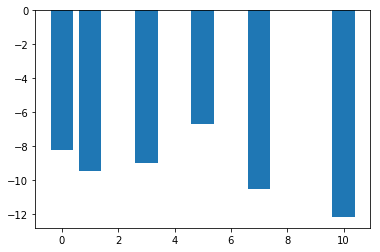

In [15]:
sed_list = []
dic_r_list = []
dsa_list = []
n = 0
for i in range(12) :
    date=date_list[n]
    using_dic,asset_list,dic_sedol_as,dic_bench,dic_beta,dic_sector,dic_MCAP,risk_sedol,risk_mat,dic_r,alpha,dic_aseet_MCAP,dic_aseet_sector,dic_risk_index=preprocessing(date)
    sed_list.append(risk_sedol)
    dsa_list.append(dic_sedol_as)
    dic_r_list.append(dic_r)
    n += 1

to = []
for i in [0, 1, 3, 5, 7, 10] :
    to.append(pickle.load(open('turnover%s.txt'%i, 'rb')))

ir = []
tl_all = []
tb_all = []
for k in range(6) :
    turn_list = []
    turn_bench = []
    for i in range(12) :
        print(i)
        if i==0 : 
            rotp_t0=0
            rotp_t1=0
            for j in sed_list[i] :
                rotp_t0 += to[k][1][i][j]*dic_r_list[i][j]
                rotp_t1 += to[k][2][i][j]*dic_r_list[i][j]
            turn_list.append(rotp_t0)
            turn_bench.append(rotp_t1)
        else :
            turn_list.append(turnover(to[k][1][i-1], to[k][1][i], i, sed_list[i-1], dsa_list[i]))
            turn_bench.append(turnover(to[k][2][i-1], to[k][2][i], i, sed_list[i-1], dsa_list[i]))
    print(turn_list[k])
    print(turn_bench[k])
    tl_all.append(turn_list)
    tb_all.append(turn_bench)
    ir.append(IR_TE(turn_list, turn_bench))

x = [0, 1, 3, 5, 7, 10]
plt.bar(x, ir)
plt.show()

In [10]:
ir

[-8.2189936912921908,
 -8.9512012395546119,
 -8.9849209092746598,
 -6.7123767445003431,
 -12.204563168354316]

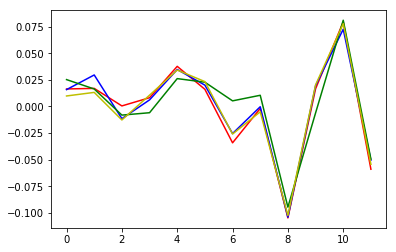

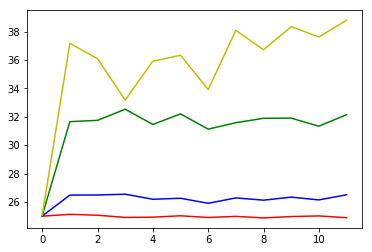

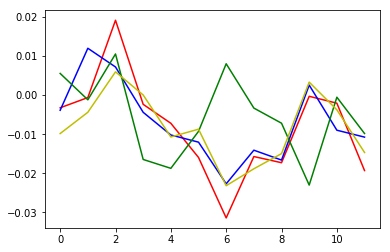

In [25]:
plt.plot(range(12), tl_all[0], c='r')
plt.plot(range(12), tl_all[1], c='b')
plt.plot(range(12), tl_all[2], c='g')
plt.plot(range(12), tl_all[3], c='y')
plt.show()
plt.plot(range(12), to[0][0], c='r')
plt.plot(range(12), to[1][0], c='b')
plt.plot(range(12), to[2][0], c='g')
plt.plot(range(12), to[3][0], c='y')
plt.show()
t_all=[]
for i in range(12) :
    t_all.append(tl_all[0][i]-tb_all[0][i])
plt.plot(range(12), t_all, c='r')
t_all=[]
for i in range(12) :
    t_all.append(tl_all[1][i]-tb_all[0][i])
plt.plot(range(12), t_all, c='b')
t_all=[]
for i in range(12) :
    t_all.append(tl_all[2][i]-tb_all[0][i])
plt.plot(range(12), t_all, c='g')
t_all=[]
for i in range(12) :
    t_all.append(tl_all[3][i]-tb_all[0][i])
plt.plot(range(12), t_all, c='y')
plt.show()
